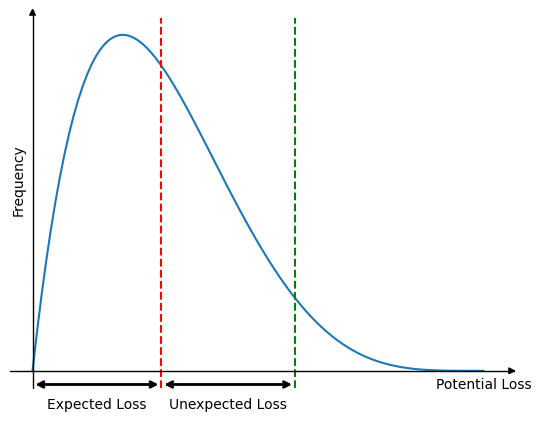

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from mpl_toolkits.axisartist.axislines import SubplotZero

# Parameters
alpha = 2
beta_param = 5
x = np.linspace(0, 1, 100)

# Beta distribution
y = beta.pdf(x, alpha, beta_param)

# Mean and 95th percentile
mean_value = beta.mean(alpha, beta_param)
percentile_95 = beta.ppf(0.95, alpha, beta_param)

fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
    
ax.plot(x, y, label=r'$\mathrm{Beta}(2, 8)$')
ax.axvline(x=mean_value, color='r', linestyle='--', label='Average')
ax.axvline(x=percentile_95, color='g', linestyle='--', label='95th Percentile')

# Brace between 0 and average
ax.annotate('', xy=(0, -0.1), xytext=(mean_value, -0.1),
             arrowprops=dict(arrowstyle='<->', lw=2))

# Brace between average and 95th percentile
ax.annotate('', xy=(mean_value, -0.1), xytext=(percentile_95, -0.1),
             arrowprops=dict(arrowstyle='<->', lw=2))

# Annotation for the Expected Loss
ax.text(mean_value / 2, -0.25, 'Expected Loss', ha='center', va='center')
ax.text((mean_value + percentile_95) / 2, -0.25, 'Unexpected Loss', ha='center', va='center')

# Axis labels
ax.text(1, -0.1, 'Potential Loss', ha='center', va='center')
ax.text(-0.03, 1.4, 'Frequency', ha='center', va='center', rotation='vertical')

# Line labels
# ax.text(0.95, 0.95, 'Average', color='r', ha='right', va='center', transform=ax.transAxes)
# ax.text(0.95, 0.9, '95th Percentile', color='g', ha='right', va='center', transform=ax.transAxes)

# Hide ticks
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both', length=0)

# save the plot to plots folder in pdf format
plt.savefig('plots\loss_distribution.pdf', format='pdf', bbox_inches='tight')